In [ ]:
Weather data observations

Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
RH : Relative Humidity in %: 21 to 90
Ws :Wind speed in km/h: 6 to 29
Rain: total day in mm: 0 to 16.8 FWI Components
Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
Drought Code (DC) index from the FWI system: 7 to 220.4
Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
Buildup Index (BUI) index from the FWI system: 1.1 to 68
Fire Weather Index (FWI) Index: 0 to 31.1
Classes: two classes, namely:
        fire and not fire

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [311]:
df=pd.read_csv("C:\\Users\\prash\\Downloads\\Algerian_forest_fires_dataset.csv")

In [312]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [313]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [314]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [315]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [316]:
df.shape

(247, 14)

In [317]:
df.shape

(247, 14)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [319]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [320]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [277]:
#there are two missing values 122 and 123 index ,separate the data in two regions


In [278]:
#we need to make new column as region to separately identify the region
#we will set Sidi-Bel Abbes Region Dataset as 2 and bejaja as 1

In [321]:
df['Region']=1
for i in range(len(df)):
    
    if i>122:
        
        df['Region'][i]==2

In [322]:
df=df.dropna().reset_index(drop=True)

In [324]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [325]:
df.value_counts('Classes')

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
Classes            1
not fire           1
not fire           1
not fire           1
dtype: int64

In [326]:
#more than two classes!
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [327]:
#these values have extra spaces hence these are showing extra spaces..so need to remove the space
df['Classes']=df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire', 'Classes'], dtype=object)

In [328]:
df[~df.Classes.isin(['fire','not fire'])]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [329]:
#we dont ned extra classes hence negating them
df=df[df.Classes.isin(['fire','not fire'])]

In [330]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.4+ KB


In [191]:
#need to change the data types of respectivve features

In [332]:
df1=df.copy()

In [333]:
df1=df1.astype({'RH':np.int64,
                'Temperature':np.int64,
                 'Ws':np.int64,
                 'Rain':np.float64,
                 'FFMC':np.float64,
                  'DMC':np.float64,
                 'DC':np.float64,
                'ISI':np.float64, 
                'BUI':np.float64, 'FWI':np.float64
                  })

In [334]:
df1.to_csv("forest_fires",index=False)

In [196]:
#exploratary data analysis

In [335]:
df1.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243,243,243,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243,243.0
unique,31,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,1,8,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,NaN
freq,8,62,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,NaN
mean,NaN,NaN,NaN,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,NaN,1.0
std,NaN,NaN,NaN,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,NaN,0.0
min,NaN,NaN,NaN,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,1.0
25%,NaN,NaN,NaN,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,NaN,1.0
50%,NaN,NaN,NaN,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,NaN,1.0
75%,NaN,NaN,NaN,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,NaN,1.0


In [336]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(4)
memory usage: 30.4+ KB


In [337]:
numeric_col=[i for i in df1.columns if df1[i].dtype!='object']
object_col=[i for i in df1.columns if df1[i].dtype=='object']


Text(0.5, 1.0, 'Distribution of features')

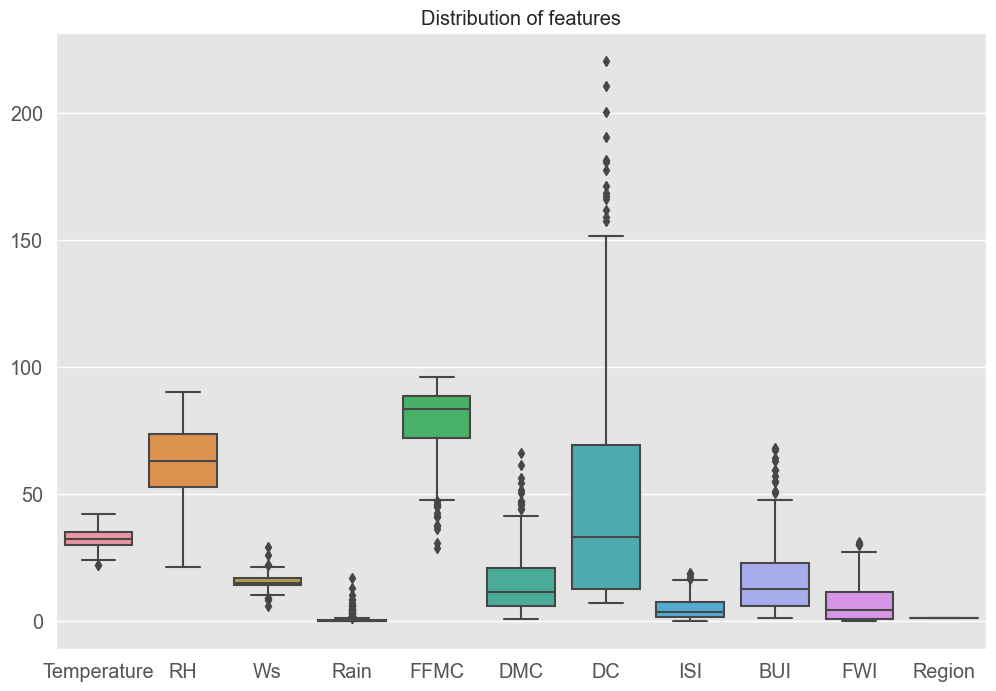

In [338]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
sns.boxplot(data=df1[numeric_col])
plt.title('Distribution of features')

Text(0.5, 1.0, 'classses distrubution,fontsize=14')

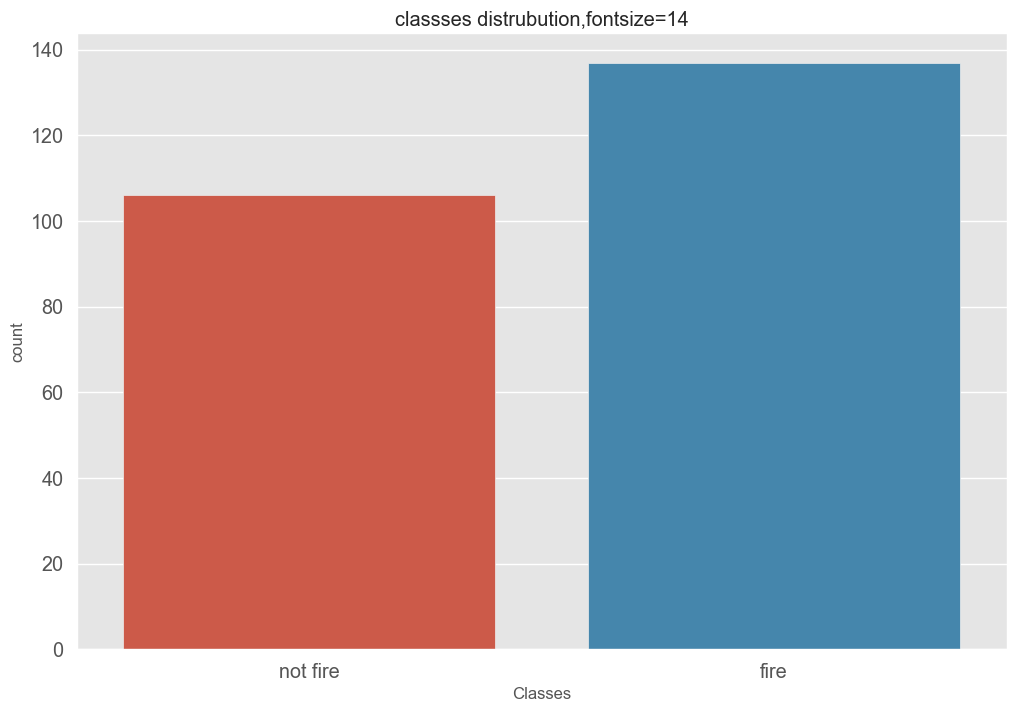

In [339]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
sns.countplot(data=df1,x='Classes')
plt.title('classses distrubution,fontsize=14')

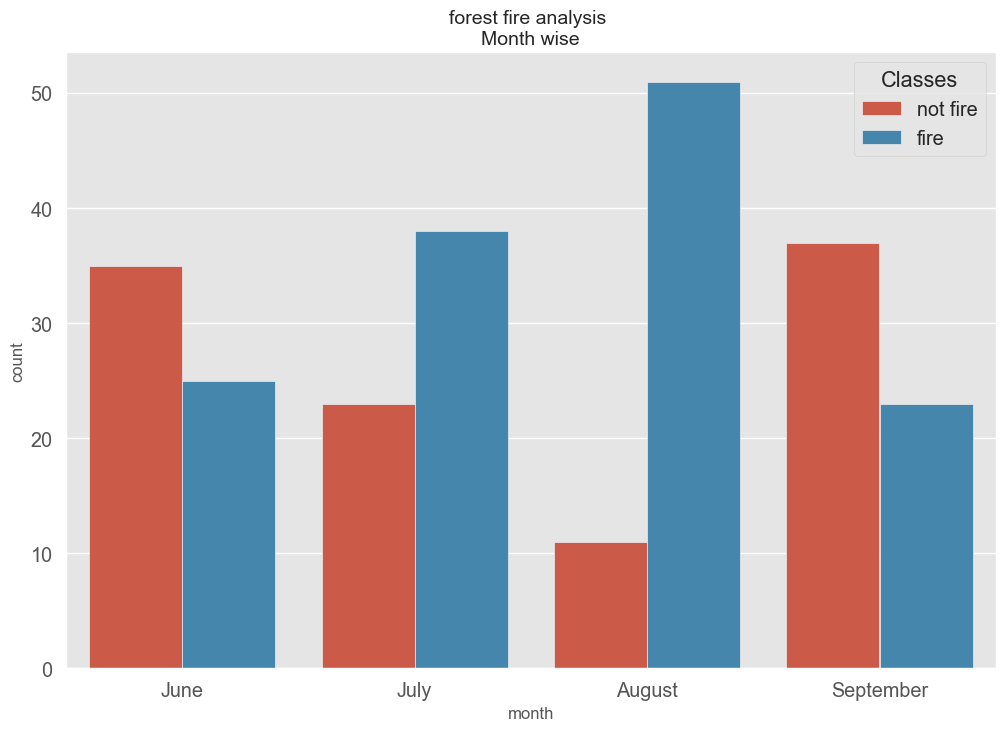

In [340]:
plt.figure(figsize=(12,8))
plt.style.use('ggplot')
sns.countplot(data=df1,x='month',hue='Classes')
plt.title('forest fire analysis \nMonth wise',fontsize=14)
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.show()

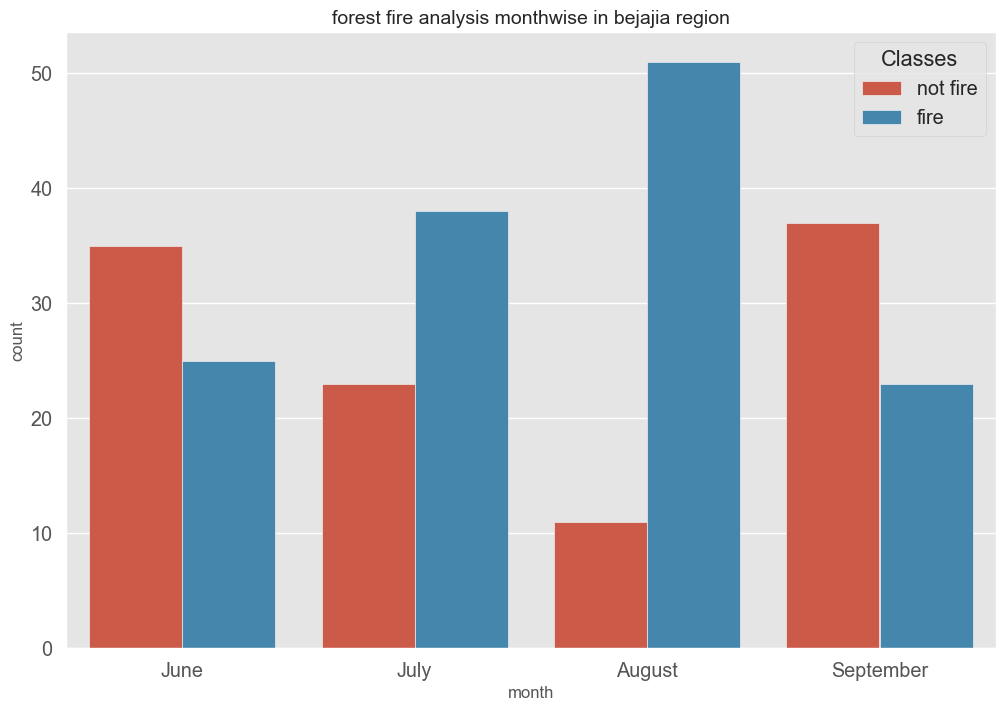

In [341]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
sns.countplot(data=df1[df1['Region']==1],x='month',hue='Classes')
plt.title('forest fire analysis monthwise in bejajia region',fontsize=14)
plt.xticks(np.arange(4),['June','July', 'August', 'September',])
plt.show()

In [367]:
def region(value):
    for i in range(len(df1)):
        if i>122:
            df1['Region'][i]=2

    

In [368]:
region(df1)

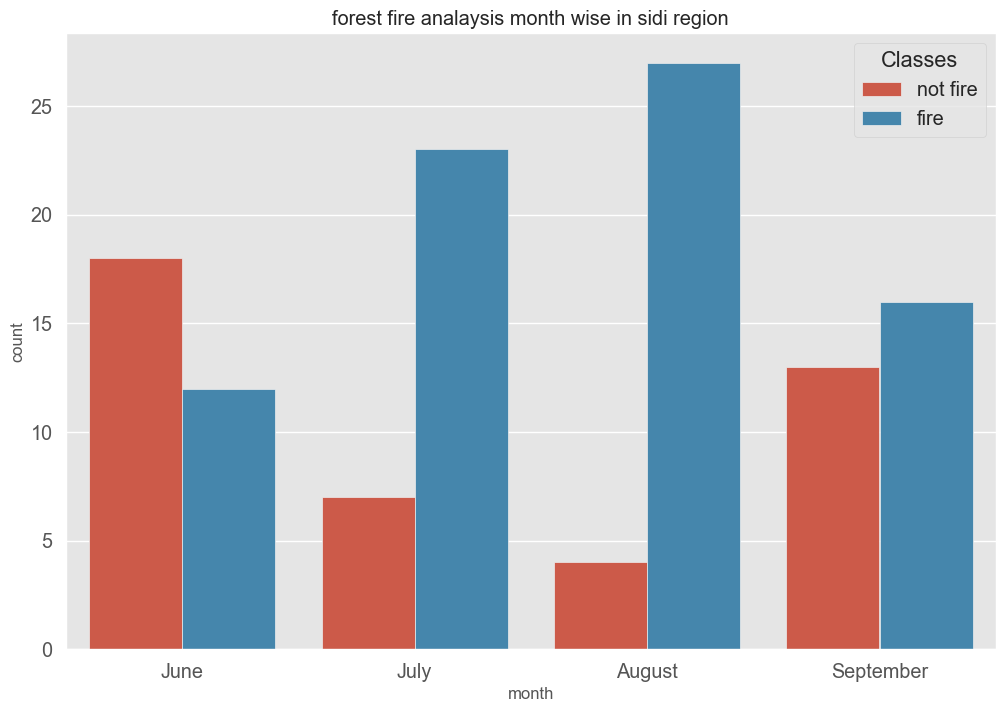

In [371]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
sns.countplot(data=df1[df1['Region']==2],x='month',hue='Classes')

plt.title('forest fire analaysis month wise in sidi region')
plt.xticks(np.arange(4),['June','July', 'August', 'September',])
plt.show()

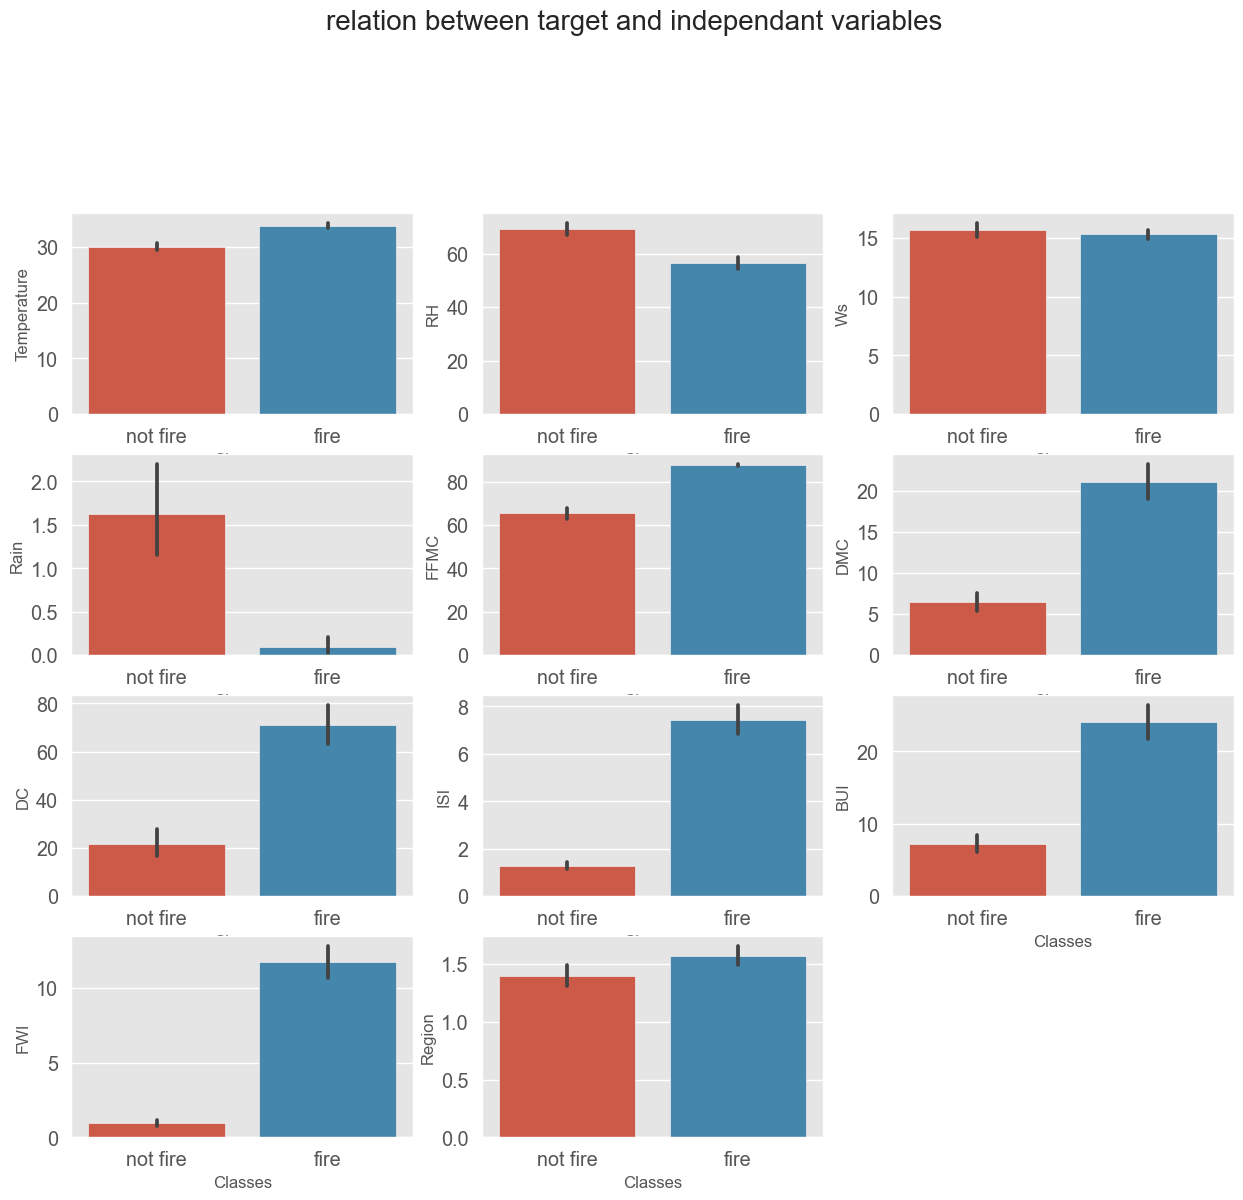

In [374]:
plt.style.use('ggplot')
plt.figure(figsize=(15,12))
plt.suptitle('relation between target and independant variables',fontsize=20,alpha=1,y=1.05)
for i in range(0,len(numeric_col)):
    plt.subplot(4,3,i+1)
    sns.barplot(x='Classes',y=numeric_col[i],data=df1)
    

In [375]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.288107
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.403798
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.179723
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.037697
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.228315
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.199343
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.073041
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.270248
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.096307
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.204360


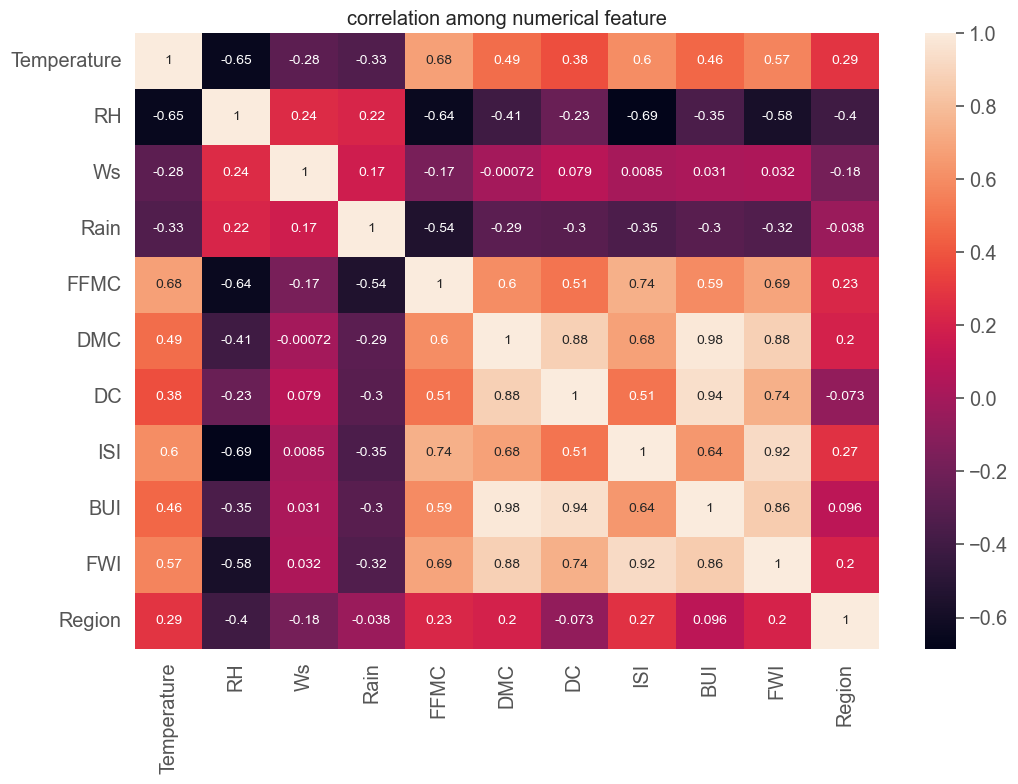

In [379]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True)
plt.title('correlation among numerical feature')
plt.show()

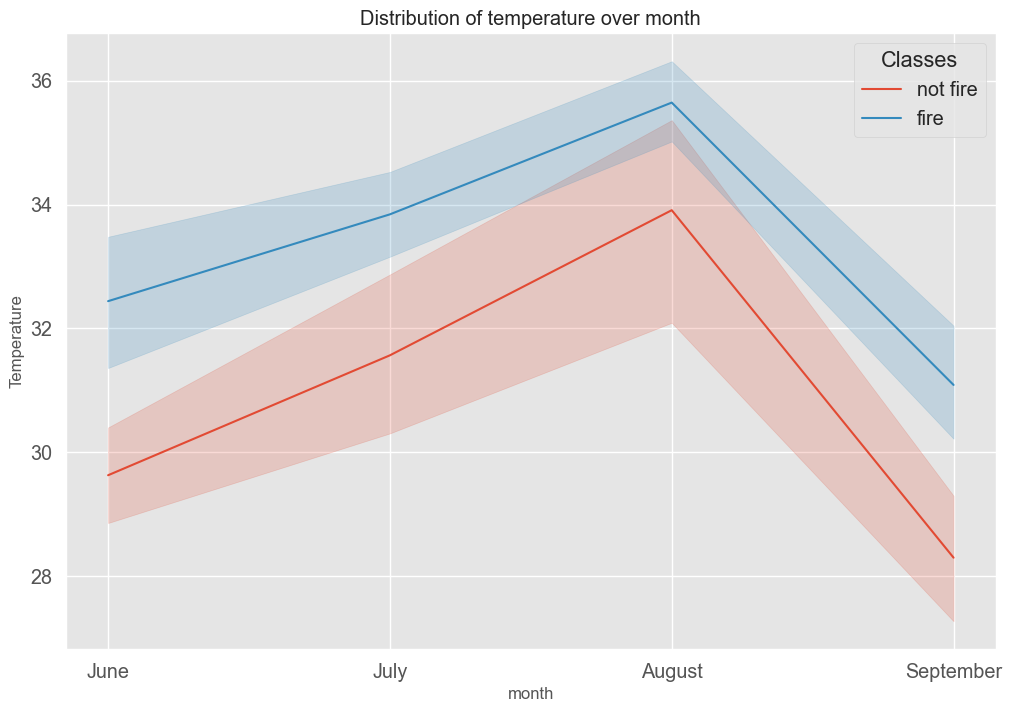

In [383]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df1,x='month',y='Temperature',color='g',hue='Classes')
plt.xticks(np.arange(4),['June','July','August','September'])
plt.title('Distribution of temperature over month')
plt.show()

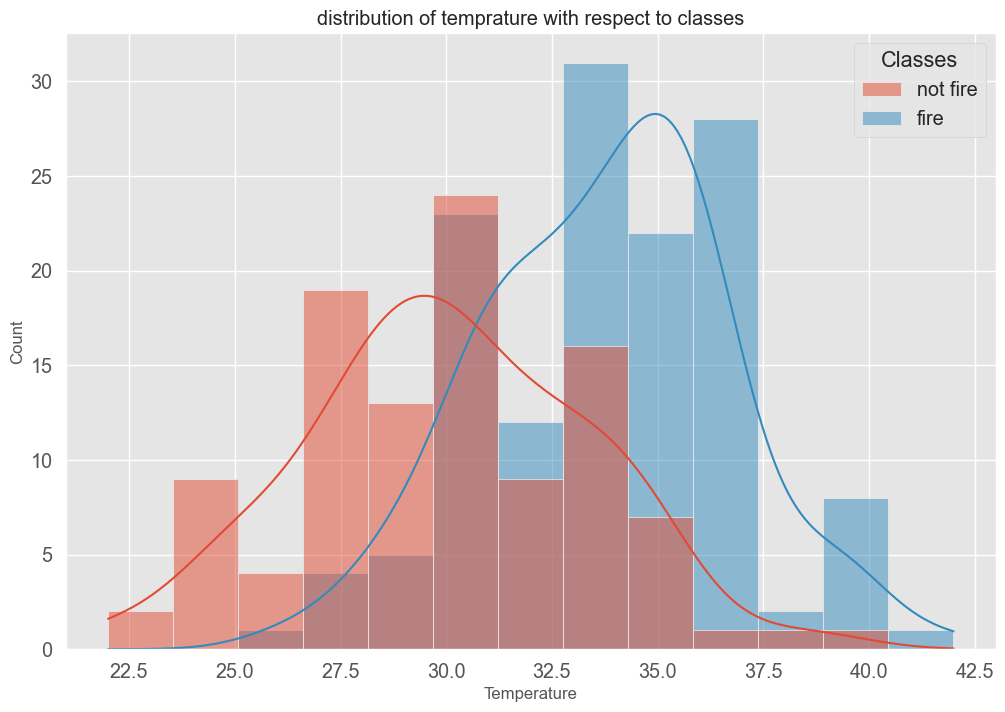

In [385]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
sns.histplot(data=df1,x='Temperature',hue='Classes',kde=True)
plt.title('distribution of temprature with respect to classes')
plt.show()

In [387]:
#data preparation for modeling and splitting the data ino training and test set
df2=df1.drop(['day','month','year'],axis=1)
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [389]:
x = df2[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI']]
y = df2['Classes']

In [390]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [391]:
#scaling features

In [393]:
def scaling(x_train,y_train):
    scaler=StandardScaler()
    x_train_scaled=scaler.fit_transform(x_train)
    x_test_scaled=scaler.fit_transform(x_test)
    return x_train_scaled,x_test_scaled

In [394]:
x_train_scaled,x_test_scaled=scaling(x_train,x_test)

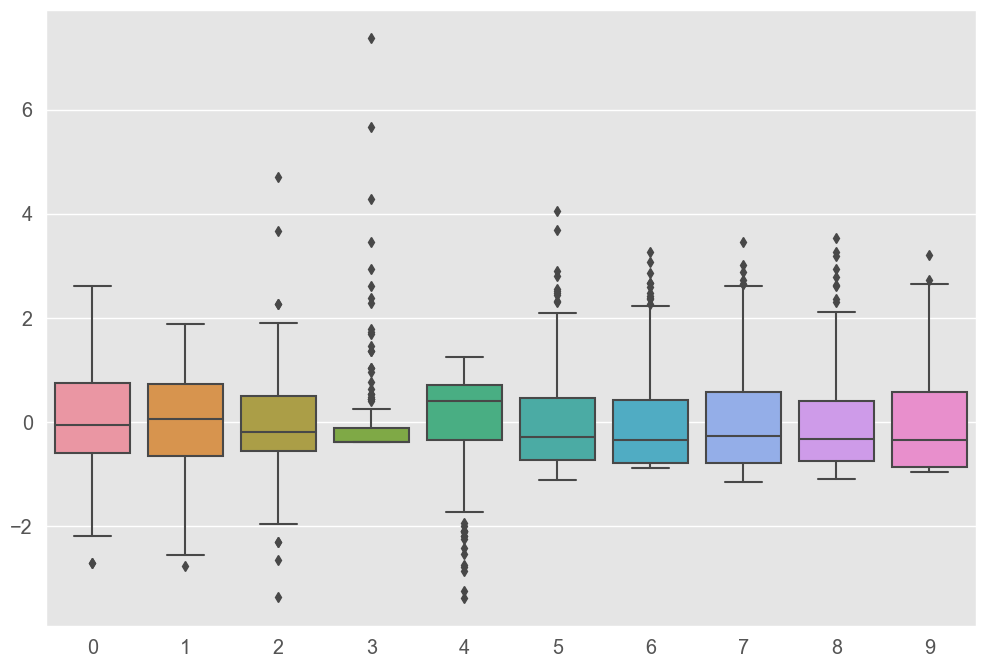

In [396]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
sns.boxplot(data=x_train_scaled)
plt.show('ditribution of feeaures after scaling')
plt.show()

In [397]:
#logistric regression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [399]:
print('accuracy of logistic regression classifier on trainig set:{}'.format(logreg.score(x_train_scaled,y_train)))

accuracy of logistic regression classifier on trainig set:0.8021978021978022


In [400]:
print('accuracy of logistic regression classifer on test set :{}'.format(logreg.score(x_test_scaled,y_test)))

accuracy of logistic regression classifer on test set :0.7540983606557377


In [402]:
logistic_regression_prediction=logreg.predict(x_test_scaled)
predicted_df=pd.DataFrame({'actual':y_test,'predicted':logistic_regression_prediction})

In [403]:
predicted_df

,actual,predicted
110,fire,fire
96,fire,not fire
240,not fire,not fire
55,fire,fire
146,fire,not fire
...,...,...
11,fire,not fire
45,not fire,not fire
56,fire,fire
89,fire,fire


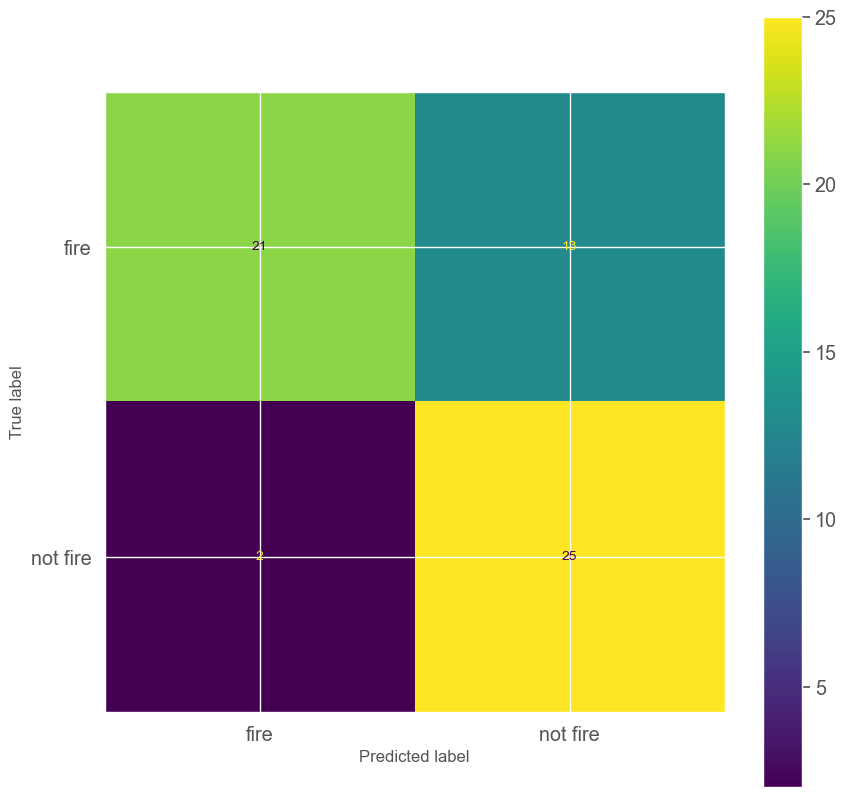

In [405]:
#confusion matrix
LRconfusion_matrix=ConfusionMatrixDisplay.from_estimator(logreg,x_test_scaled,y_test)

In [408]:
#decision tree classifier
DT_clf = DecisionTreeClassifier()
DT_clf .fit(x_train_scaled, y_train)
print('Accuracy of Logistic regression classifier on training set: {}'
     .format(DT_clf .score(x_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set: {}'
     .format(DT_clf .score(x_test_scaled, y_test)))

Accuracy of Logistic regression classifier on training set: 1.0
Accuracy of Logistic regression classifier on test set: 0.9344262295081968


In [409]:
DT_Prediction = DT_clf.predict(x_test_scaled)
DT_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted ': DT_Prediction})    
DT_predicted_df.head(10)

,Actual,Predicted
110,fire,fire
96,fire,fire
240,not fire,not fire
55,fire,fire
146,fire,fire
71,fire,fire
80,fire,fire
49,fire,fire
207,fire,fire
132,fire,fire


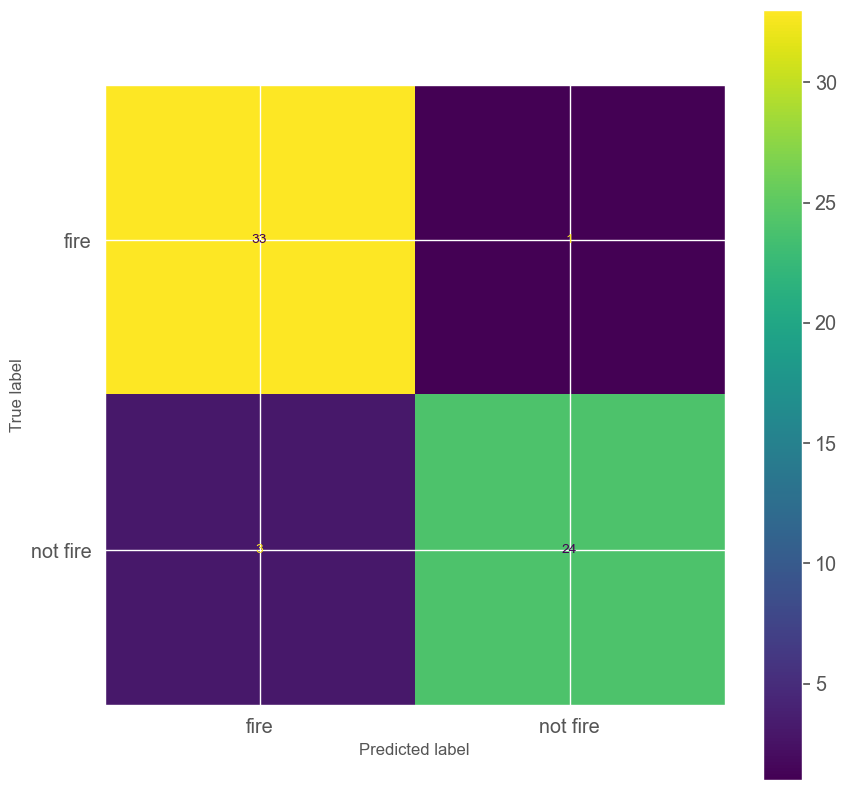

In [410]:
DT_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(DT_clf , x_test_scaled, y_test)
DT_Confusion_Matrix
plt.show()

In [413]:
#random forest classifier

RF_clf = RandomForestClassifier()
RF_clf.fit(x_train_scaled, y_train)
print('Accuracy of Logistic regression classifier on training set: {}'
      .format(RF_clf .score(x_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set: {}'
      .format(RF_clf .score(x_test_scaled, y_test)))

Accuracy of Logistic regression classifier on training set: 1.0
Accuracy of Logistic regression classifier on test set: 0.9508196721311475


In [418]:

RF_Prediction = RF_clf.predict(x_test_scaled)
RF_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted ': RF_Prediction})    
RF_predicted_df.head(10)

,Actual,Predicted
110,fire,fire
96,fire,fire
240,not fire,not fire
55,fire,fire
146,fire,fire
71,fire,fire
80,fire,fire
49,fire,fire
207,fire,fire
132,fire,fire


In [425]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)

In [426]:

XGB_clf = XGBClassifier()
XGB_clf.fit(x_train_scaled, y_train_encoded)
print('Accuracy of Logistic regression classifier on training set: {:.4f}'
     .format(XGB_clf .score(x_train_scaled, y_train_encoded)))
print('Accuracy of Logistic regression classifier on test set: {:.4f}'
     .format(XGB_clf .score(x_test_scaled, y_test_encoded)))

Accuracy of Logistic regression classifier on training set: 0.9945
Accuracy of Logistic regression classifier on test set: 0.9344


In [436]:
import pandas as pd

# Make predictions on the test data using the trained classifier
xgb_pred = XGB_clf.predict(x_test_scaled)

# Create a DataFrame to compare actual and predicted values
xgb_predicted_df = pd.DataFrame({'actual': y_test_encoded, 'predicted': xgb_pred})

#decode the encode labels back to original class labels
xgb_predicted_df['actual']=label_encoder.inverse_transform(xgb_predicted_df['actual'])
xgb_predicted_df['predicted']=label_encoder.inverse_transform(xgb_predicted_df['predicted'])
xgb_predicted_df


,actual,predicted
0,fire,fire
1,fire,fire
2,not fire,not fire
3,fire,fire
4,fire,fire
...,...,...
56,fire,fire
57,not fire,not fire
58,fire,fire
59,fire,fire


In [440]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

Text(0.5, 1.0, 'confusion matrix for xgboost classifier')

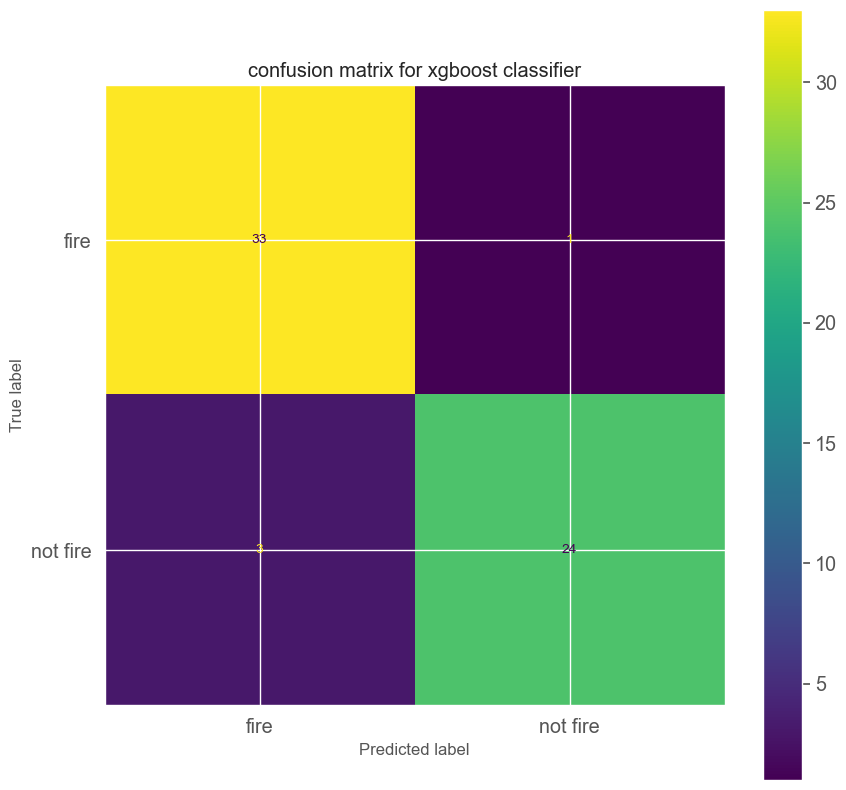

In [448]:
xgb_pred=XGB_clf.predict(x_test_scaled)
confusion_matrix_result=confusion_matrix(y_test_encoded,xgb_pred)
xgb_confusion_matrix=ConfusionMatrixDisplay(confusion_matrix_result,display_labels=label_encoder.classes_)
xgb_confusion_matrix.plot(cmap='viridis')
plt.title('confusion matrix for xgboost classifier')

In [449]:
#need to do hyperparameter tuning


In [451]:
feature_importance=XGB_clf.feature_importances_
importance_df=pd.DataFrame({'feature':x_train.columns,
                           'importance':feature_importance}).sort_values('importance',ascending=False)

In [452]:
importance_df

,feature,importance
4,FFMC,0.914674
7,ISI,0.054756
5,DMC,0.017334
3,Rain,0.004031
9,FWI,0.003540
1,RH,0.002695
0,Temperature,0.002285
6,DC,0.000368
8,BUI,0.000317
2,Ws,0.000000


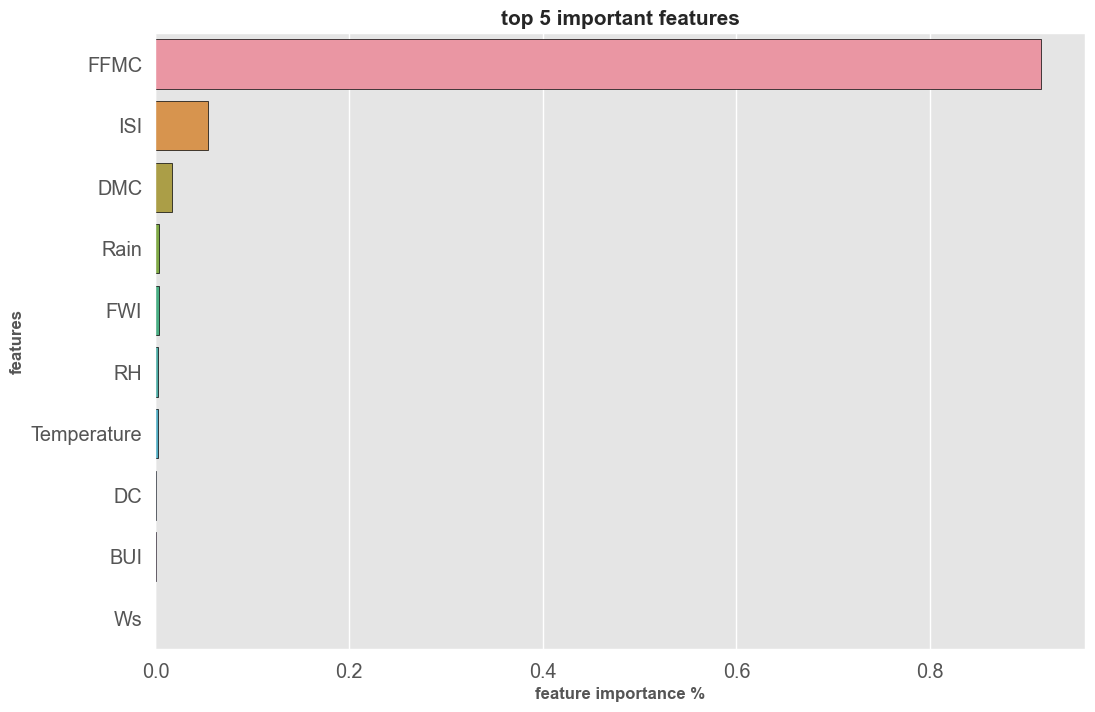

In [453]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
ax=sns.barplot(data=importance_df,x='importance',y='feature',ec='black')
ax.set_title('top 5 important features', weight='bold',fontsize=15)
ax.set_xlabel('feature importance %',weight='bold')
ax.set_ylabel('features',weight='bold')
plt.show()

In [472]:
#Top Five features are: FFMC, ISI, DMC,Rain,FWI,RH
#run the model with these features only
x_train_new=x_train[['FFMC', 'ISI', 'DMC','Rain','FWI','RH']]

x_test_new = x_test[['FFMC', 'ISI', 'DMC','Rain','FWI','RH']]
     


In [473]:
x_train_new.columns

Index(['FFMC', 'ISI', 'DMC', 'Rain', 'FWI', 'RH'], dtype='object')

In [474]:
x_train_scalednew,x_test_scalednew=scaling(x_train_new,x_test_new)

In [466]:
y_train_encodednew = label_encoder.fit_transform(y_train)
y_test_encodednew = label_encoder.transform(y_test)


In [480]:

XGB_clf2 = XGBClassifier()
XGB_clf2.fit(x_train_scalednew, y_train_encoded)
print('Accuracy of XGBoost classifier on training set: {:.4f}'.format(XGB_clf2.score(x_train_scalednew, y_train_encoded)))
print('Accuracy of XGBoost classifier on test set: {:.4f}'.format(XGB_clf2.score(x_test_scalednew, y_test_encoded)))


Accuracy of XGBoost classifier on training set: 0.9945


ValueError: Feature shape mismatch, expected: 6, got 10

In [481]:
print("Training data shape:", x_train_scalednew.shape)
print("Test data shape:", x_test_scalednew.shape)


Training data shape: (182, 6)
Test data shape: (61, 10)
